In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [11]:
df_raw = pd.read_csv("D:\data-final-selected.csv", sep = "\t", quotechar=" ").dropna()
df_raw.rename(columns = {"\"EXT1" : "EXT1", "long_appx_lots_of_err\"" : "long_appx_lots_of_err"}, \
              inplace=True)
df_raw["EXT1"] = df_raw.EXT1.apply(lambda x: x.replace("\"", ""))
df_raw["long_appx_lots_of_err"] = df_raw["long_appx_lots_of_err"].apply(lambda x: x.replace("\"", ""))
df_raw["EXT1"] = df_raw.EXT1.astype("int64")

In [12]:
df = df_raw[df_raw.columns[:50]].copy()

print(df.head(3))
print("Sample size : {}".format(len(df)))

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0     4     1     5     2     5     1     5     2     4      1  ...     5   
1     3     5     3     4     3     3     2     5     1      5  ...     1   
2     2     3     4     4     3     2     1     3     2      5  ...     5   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0     1     4     1     4     1     5     3     4      5  
1     2     4     2     3     1     4     2     5      3  
2     1     2     1     4     2     5     3     4      4  

[3 rows x 50 columns]
Sample size : 10432


In [13]:
#deriving labels

score_E = lambda row: 20 + \
                row["EXT1"] - row["EXT2"] + \
                row["EXT3"] - row["EXT4"] + \
                row["EXT5"] - row["EXT6"] + \
                row["EXT7"] - row["EXT8"] + \
                row["EXT9"] - row["EXT10"]
df["score_E"] = df.apply(score_E, axis=1)

score_A = lambda row: 14 - \
                row["AGR1"] + row["AGR2"] - \
                row["AGR3"] + row["AGR4"] - \
                row["AGR5"] + row["AGR6"] - \
                row["AGR7"] + row["AGR8"] + \
                row["AGR9"] + row["AGR10"]
df["score_A"] = df.apply(score_A, axis=1)

score_C = lambda row: 14 + \
                row["CSN1"] - row["CSN2"] + \
                row["CSN3"] - row["CSN4"] + \
                row["CSN5"] - row["CSN6"] + \
                row["CSN7"] - row["CSN8"] + \
                row["CSN9"] + row["CSN10"]
df["score_C"] = df.apply(score_C, axis=1)

score_N = lambda row: 38 - \
                row["EST1"] + row["EST2"] - \
                row["EST3"] + row["EST4"] - \
                row["EST5"] - row["EST6"] - \
                row["EST7"] - row["EST8"] - \
                row["EST9"] - row["EST10"]
df["score_N"] = df.apply(score_N, axis=1)

score_O = lambda row: 8 + \
                row["OPN1"] - row["OPN2"] + \
                row["OPN3"] - row["OPN4"] + \
                row["OPN5"] - row["OPN6"] + \
                row["OPN7"] + row["OPN8"] + \
                row["OPN9"] + row["OPN10"]
df["score_O"] = df.apply(score_O, axis=1)   

print(df.head(3))

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN6  \
0     4     1     5     2     5     1     5     2     4      1  ...     1   
1     3     5     3     4     3     3     2     5     1      5  ...     1   
2     2     3     4     4     3     2     1     3     2      5  ...     2   

   OPN7  OPN8  OPN9  OPN10  score_E  score_A  score_C  score_N  score_O  
0     5     3     4      5       36       29       22       26       35  
1     4     2     5      3       10       34       27       25       25  
2     5     3     4      4       15       32       24       24       31  

[3 rows x 55 columns]


In [14]:
def personality(row):
    big_letter = ""
    highest_score = 0
    if row["score_E"] > highest_score:
        highest_score = row["score_E"]
        big_letter = "E"
    if row["score_A"] > highest_score:
        highest_score = row["score_A"]
        big_letter = "A"
    if row["score_C"] > highest_score:
        highest_score = row["score_C"]
        big_letter = "C"
    if row["score_N"] > highest_score:
        highest_score = row["score_N"]
        big_letter = "N"
    if row["score_O"] > highest_score:
        highest_score = row["score_O"]
        big_letter = "O"
    return big_letter

df["target"] = df.apply(personality, axis=1)
print(df.head(3))

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN7  \
0     4     1     5     2     5     1     5     2     4      1  ...     5   
1     3     5     3     4     3     3     2     5     1      5  ...     4   
2     2     3     4     4     3     2     1     3     2      5  ...     5   

   OPN8  OPN9  OPN10  score_E  score_A  score_C  score_N  score_O  target  
0     3     4      5       36       29       22       26       35       E  
1     2     5      3       10       34       27       25       25       A  
2     3     4      4       15       32       24       24       31       A  

[3 rows x 56 columns]


In [15]:
samples = df[df.columns[:50]].copy()

model = KMeans(n_clusters = 5, random_state=6)
model.fit(samples)

labels = model.predict(samples)
print(labels)

[2 1 1 ... 4 4 4]


In [16]:
target = df.target.values
big_five_personality = np.chararray(target.shape, itemsize=10432)

for i in range(len(samples)):
    if target[i] == "E":
        big_five_personality[i] = "Extraversion"
    elif target[i] == "N":
        big_five_personality[i] = "Neuroticism"
    elif target[i] == "A":
        big_five_personality[i] = "Agreeableness"
    elif target[i] == "C":
        big_five_personality[i] = "Conscientiousness"
    elif target[i] == "O":
        big_five_personality[i] = "Openness"

new_df = pd.DataFrame({"labels": labels, "big_five_personality" : big_five_personality})
table = pd.crosstab(new_df["labels"], new_df["big_five_personality"])
print(table)

big_five_personality  b'Agreeableness'  b'Conscientiousness'  b'Extraversion'  \
labels                                                                          
0                                  128                   323               80   
1                                 1055                   526                0   
2                                  737                   219              380   
3                                  982                   200                7   
4                                  996                    79              456   

big_five_personality  b'Neuroticism'  b'Openness'  
labels                                             
0                                351          789  
1                                104          491  
2                                285          433  
3                                  1          954  
4                                  0          856  


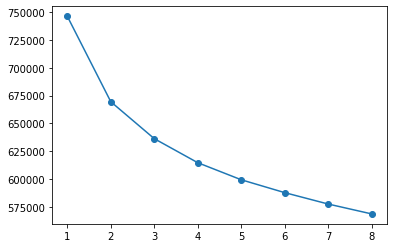

In [17]:
num_clusters = list(range(1,9))
inertias = []
for k in num_clusters:
    model_1 = KMeans(n_clusters=k, random_state=6)
    model_1.fit(samples)
    inertias.append(model_1.inertia_)
plt.plot(num_clusters, inertias, "-o")
plt.show()

In [18]:
# 4 fictitious characters 

Willy = np.array([5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, \
                  5.0, 1.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, \
                  5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 5.0, \
                  1.0, 5.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, \
                  1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0])
Xavier = np.array([1.0, 5.0, 3.0, 5.0, 1.0, 4.0, 1.0, 5.0, 1.0, 4.0, \
                   2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, \
                   4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 2.0, 1.0, 3.0, \
                   2.0, 2.0, 1.0, 4.0, 4.0, 1.0, 3.0, 4.0, 1.0, 1.0, \
                   1.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 1.0, 4.0, 2.0])
Yenny = np.array([5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, \
                  1.0, 2.0, 2.0, 4.0, 2.0, 3.0, 4.0, 2.0, 4.0, 1.0, \
                  1.0, 4.0, 2.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, \
                  5.0, 1.0, 5.0, 1.0, 4.0, 4.0, 4.0, 1.0, 5.0, 5.0, \
                  5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0])
Zee = np.array([2.0, 1.0, 5.0, 4.0, 5.0, 1.0, 1.0, 2.0, 1.0, 3.0, \
                1.0, 5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, \
                2.0, 4.0, 1.0, 5.0, 2.0, 5.0, 2.0, 5.0, 5.0, 5.0, \
                4.0, 2.0, 2.0, 1.0, 1.0, 4.0, 5.0, 4.0, 2.0, 1.0, \
                4.0, 5.0, 2.0, 5.0, 2.0, 4.0, 3.0, 3.0, 5.0, 1.0])

fictitious_individuals = np.array([Willy, Xavier, Yenny, Zee])

print(model.predict(fictitious_individuals))

[4 0 2 2]
